# Problem set 6: Solving the Solow model

In [19]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm

# Tasks

## Solving matrix equations I

In [20]:
np.random.seed(1900)
n = 5
A = np.random.uniform(size=(n,n))
b = np.random.uniform(size=n)
c = np.random.uniform(size=n)
d = np.random.uniform(size=n)

**Question A:** Find the determinant of $[A \cdot A]^{-1}$

In [38]:
# write your code here
detA = linalg.det(linalg.inv(A@A))
print(detA)

13132.548734460965


**Answer:** see A1.py

**Question B:** Solve the following equation systems directly using **scipy**.

$$
\begin{aligned}
Ax &= b \\
Ax &= c \\
Ax &= d 
\end{aligned}
$$

In [22]:
x_b = linalg.solve(A, b)
x_c = linalg.solve(A, c)
x_d = linalg.solve(A, d)

print(x_b)
print(x_c)
print(x_d)

[-15.33189031 -24.00998148  40.02675108  15.24193293   4.89008792]
[ -7.72469812 -11.6354722   20.86796131   7.93343031   1.55909328]
[-2.57374569 -4.00256301  7.93409587  2.56007481  1.25709881]


**Answer:** A2.py

**Question C:** Solve the same equation systems as above using `linalg.lu_factor()` and `linalg.lu_solve()`. What is the benefit of this approach?

In [23]:
LU, piv = linalg.lu_factor(A) # perform LU-decomposition (only once)

x_b_lu = linalg.lu_solve((LU, piv), b) 
x_c_lu = linalg.lu_solve((LU, piv), c)
x_d_lu = linalg.lu_solve((LU, piv), d)

print(x_b_lu)
print(x_c_lu)
print(x_d_lu)

[-15.33189031 -24.00998148  40.02675108  15.24193293   4.89008792]
[ -7.72469812 -11.6354722   20.86796131   7.93343031   1.55909328]
[-2.57374569 -4.00256301  7.93409587  2.56007481  1.25709881]


In [24]:
# The LU-factorization approach is much faster:
%timeit linalg.solve(A, b)
%timeit LU, piv = linalg.lu_factor(A); x_b_lu = linalg.lu_solve((LU, piv), b)
print()

# Especially when LU, piv has already been computed once:
%timeit linalg.solve(A, b)
%timeit x_b_lu = linalg.lu_solve((LU, piv), b)

75.1 µs ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
32.2 µs ± 6.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

76.7 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
16.1 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


**Answer:** A3.py

## Solving matrix equations II

In [25]:
F = np.array([[2.0, 1.0, -1.0], [-3.0, -1.0, 2], [-2.0, 1.0, 2.0]])
e = np.array([8.0, -11.0, -3.0])

**Question:** Use the function `gauss_jordan()` in the `numecon_linalg` module located in this folder to solve

$$
Fx = e
$$

In [26]:
from numecon_linalg import *

Z = np.column_stack((F,e))
gauss_jordan(Z)
x = Z[:,-1]
print(x)

[ 2.  3. -1.]


In [27]:
# not as fast:
%timeit Z = np.column_stack((F,e)); gauss_jordan(Z)

128 µs ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Answer:** see A4.py

## Symbolic

**Question A:** Find

$$
\lim_{x \rightarrow 0} \frac{\sin(x)}{x}
$$

and

$$
\frac{\partial\sin(2x)}{\partial x} 
$$

In [10]:
import sympy as sm

# define symbols
x = sm.symbols('x')

# Function 1
f1 = sm.sin(x)/x
lim_x0 = sm.limit(f1, x, 0)
print(f'The limit of {f1} as x goes 0 is {lim_x0}')

# Function 2
f2 = sm.sin(2*x)/x
f2_diff = sm.diff(f2, x)
print(f'The derivative of {f2} is {f2_diff}')

The limit of sin(x)/x as x goes 0 is 1
The derivative of sin(2*x)/x is 2*cos(2*x)/x - sin(2*x)/x**2


**Answer:** A5.py

**Question B:** Solve the equation

$$ 
\frac{\sin(x)}{x} = 0
$$

In [11]:
# write your code here
eq = sm.Eq(f1, 0)
sol = sm.solveset(eq,  x)
sol # gives all solutions in set notation 

Union(Complement(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), {0}), Complement(ImageSet(Lambda(_n, 2*_n*pi), Integers), {0}))

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in divide
  return sin(x)/x


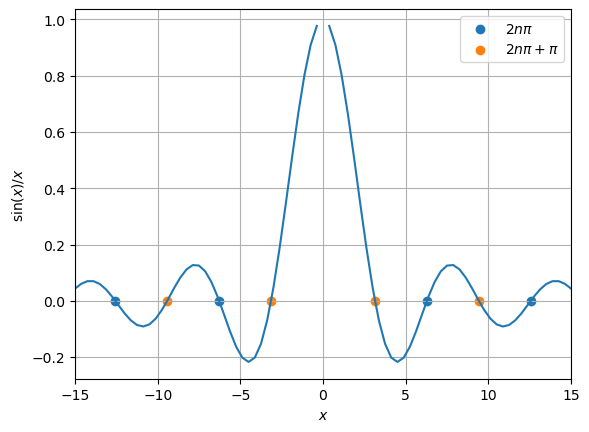

In [12]:
# Visual solution:

import matplotlib.pyplot as plt
func = sm.lambdify(x,f1)
x_vec = np.linspace(-15, 15, 81)
f_vec = func(x_vec)

# plot function
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_vec, f_vec)

# plot roots
ns = list(range(-5,5))
ns = np.array(ns)
root1 = list(2*np.pi*ns)
root1.remove(0)
root2 = list(2*np.pi*ns+np.pi)
ax.scatter(root1, np.zeros(len(root1)), label='$2n\pi$')
ax.scatter(root2, np.zeros(len(root2)), label='$2n\pi + \pi$')

ax.legend()
ax.grid()
ax.set_xlim(-15,15)
ax.set_xlabel('$x$')
ax.set_ylabel('$\sin(x)/x$');

**Answer:** A6.py

# Problem: Solve the Solow model

## Introduction

Consider the **standard Solow-model** where:

1. $K_t$ is capital2
2. $L_t$ is labor (growing with a constant rate of $n$)
3. $A_t$ is technology (growing with a constant rate of $g$)
4. $Y_t = F(K_t,A_tL_t)$ is GDP

**Saving** is a constant fraction of GDP

$$ 
S_t = sY_t,\,s\in(0,1)
$$

such that **capital accumulates** according to

$$
K_{t+1}=S_{t}+(1-\delta)K_{t}=sF(K_{t},A_{t}L_{t})+(1-\delta)K_{t}, \delta \in (0,1)
$$

The **production function** has **constant-return to scale** such that

$$
\frac{Y_{t}}{A_{t}L_{t}}=\frac{F(K_{t},A_{t}L_{t})}{A_{t}L_{t}}=F(\tilde{k}_{t},1)\equiv f(\tilde{k}_{t})
$$

where $\tilde{k}_t = \frac{K_t}{A_{t}L_{t}}$ is the technology adjusted capital-labor ratio.

The **transition equation** then becomes

$$
\tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}_{t})+(1-\delta)\tilde{k}_{t}]
$$

If the **production function** is **Cobb-Douglas** then

$$
F(K_{t},A_{t}L_{t})=K_{t}^{\alpha}(A_{t}L_{t})^{1-\alpha}\Rightarrow f(\tilde{k}_{t})=\tilde{k}_{t}^{\alpha}
$$

If it is **CES** (with $\beta < 1, \beta \neq 0$) then

$$
F(K_{t},A_{t}L_{t})=(\alpha K_{t}^{\beta}+(1-\alpha)(A_{t}L_{t})^{\beta})^{\frac{1}{\beta}}\Rightarrow f(\tilde{k}_{t})=(\alpha\tilde{k}_{t}^{\beta}+(1-\alpha))^{\frac{1}{\beta}}
$$

## Steady state

Assume the production function is **Cobb-Douglas**.

**Question A:** Use **sympy** to find an analytical expression for the steady state, i.e. solve

$$
\tilde{k}^{\ast}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}]
$$

In [13]:
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')

In [14]:
# production
f = k**alpha

# transition equation
transition_sym = 1/((1+n)*(1+g))*(s*f+(1-delta)*k)

# solve for steady state
ss_eq = sm.Eq(k, transition_sym)
ss = sm.solve(ss_eq, k)[0]
ss


((delta + g*n + g + n)/s)**(1/(alpha - 1))

**Answer:** see A7.py

**Question B:** Turn you solution into a Python function called as `ss_func(s,g,n,delta,alpha)`. 

In [15]:
ss_func = sm.lambdify((s,g,n,delta,alpha), ss)

ss_func(0.25, 0.02, 0.02, 0.1, 0.3)

2.2801388112575736

**Answer:** A8.py

**Question C**: Find the steady state numerically using root-finding with `optimize.root_scalar`.

In [39]:
s = 0.2
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.1

# write your code here
# define transition equation:
def transition_num(k, f, s,g,n,alpha,delta, beta=None): # include beta as a kwarg so I can reuse this later
    fk = f(k, alpha, beta) # production function
    return 1/((1+n)*(1+g))*(s*fk +(1-delta)*k)

## Cobb-Douglas production function
def f_cd(k,alpha,beta=None):
    return k**alpha

# define objective for root finder
obj = lambda k: transition_num(k, f_cd, s,g,n,alpha,delta) - k

# find root
res = optimize.root_scalar(obj, bracket=[0.01, 10], method='brentq')
print('Numrical:', res.root)

# is this the same as what sympy found?
print('SymPy:', ss_func(s,g,n,delta,alpha))

Numrical: 1.9038315392313176
SymPy: 1.903831539231319


**Answer:** A9.py

**Question D:** Now assume the production function is CES. Find the steady state for $k$ for the various values of $\beta$ shown below.

In [40]:
betas = [-0.5,-0.25,-0.1,-0.05,0.05,0.1,0.25,0.5]
ss_vec = np.zeros(len(betas))

# define CES production function
def f_ces(k,alpha, beta):
    if beta == 0:
        return k**alpha # limit as beta goes to 0
    else:
        return (alpha*k**beta +(1-alpha))**(1/beta)


# find root
for i, beta in enumerate(betas): 
    
    # define objective function
    obj = lambda k: transition_num(k,f_ces, s,g,n,alpha,delta,beta=beta) - k   

    # find root
    res = optimize.root_scalar(obj, bracket=[0.01, 10], method='brentq')
    assert res.converged

    # store result
    ss_vec[i] = res.root


## Can this be done using SymPy?

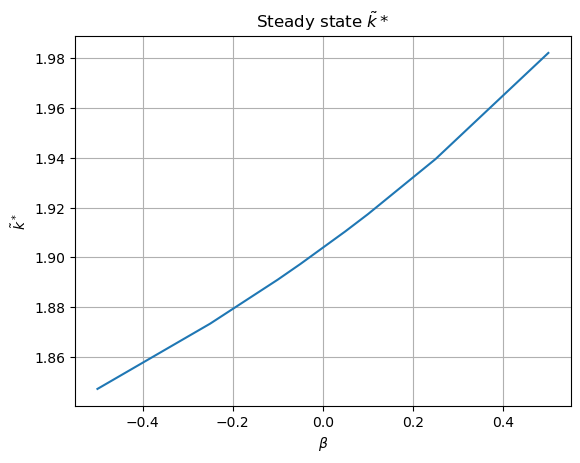

In [18]:
from matplotlib import pyplot as plt

plt.plot(betas, ss_vec)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\tilde{k}^*$')
plt.grid(True)
plt.title(r'Steady state $\tilde{k}*$');

**Answer:** A10.py   